In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def plot_configs(ax):
    plt.rcParams['text.usetex'] = True

    # Set bourder line
    for axis in ['top','bottom','left','right']:
        ax.spines[axis].set_linewidth(1.5)

    # Tick parameters
    ax.tick_params(axis = 'both', which = 'major', length = 6, width = 1, direction = 'in', labelsize = 16)
    ax.tick_params(axis = 'both', which = 'minor', length = 4, width = 1, direction = 'in', labelsize = 16)
    ax.tick_params(labelbottom = True, labeltop = False, labelleft = True, labelright = False,
                     bottom = True, top = True, left = True, right = True)
    ax.yaxis.set_tick_params(right='on',which='both')
    return ax

In [4]:
"""This part of the code meant to deal with ramping rf signals.

Parameters
----------

freq_init : The initial ramping freq
freq_final : The target ramping freq
t_step : The time one wants to spent on a specific move

Note
----
Function will figure out the appropriate acceleration for tweezer.
"""
# Accleration
seg1 = lambda t, t_all, a: (1/2) * a * t**2
# Deaccleration
seg2 = lambda t, t_all, a: -(1/2) * a * t**2 + a*t*t_all - (1/4)*a*t_all**2

### Test section for ramping once.

#### Positive case

end = 0.25
t_data[-1] = 1.0


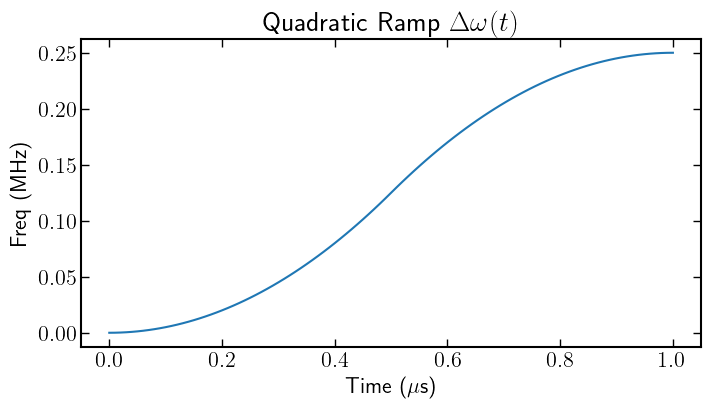

In [12]:
t_all = 1
a = 1
print(f"end = {seg2(t_all, t_all, a)}")
t1_data = np.linspace(0, t_all/2, endpoint=False)
t2_data = np.linspace(t_all/2, t_all)
t_data = np.append(t1_data, t2_data)
print(f"t_data[-1] = {t_data[-1]}")
data = np.append(seg1(t1_data, t_all, a), seg2(t2_data, t_all, a))


fig, ax = plt.subplots(figsize=(8,4))
plot_configs(ax)
ax.plot(t_data, data)
ax.set_title(r'Quadratic Ramp $\Delta \omega (t)$', fontsize = 20)
ax.set_xlabel(r"Time ($\mu$s)", fontsize = 16)
ax.set_ylabel(r'Freq (MHz)', fontsize = 16)
plt.show()

#### Negative case

end = -0.25
t_data[-1] = 1.0


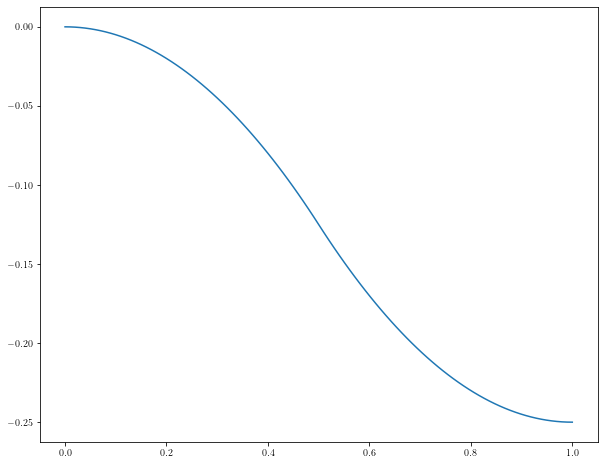

In [38]:
t_all = 1
a = 1
print(f"end = {-seg2(t_all, t_all, a)}")
t1_data = np.linspace(0, t_all/2, endpoint=False)
t2_data = np.linspace(t_all/2, t_all)
t_data = np.append(t1_data, t2_data)
print(f"t_data[-1] = {t_data[-1]}")
data = np.append(-seg1(t1_data, t_all, a), -seg2(t2_data, t_all, a))
fig, ax = plt.subplots(figsize=(10,8))
ax.plot(t_data, data)
plt.show()

### Test section for ramping twice or more.

end = 0.25
end = 0.25


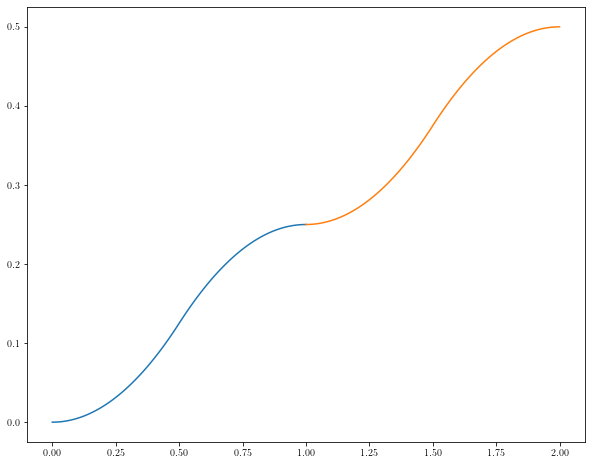

In [39]:
# First ramp
t_all_sec1 = 1
a = 1
print(f"end = {seg2(t_all_sec1, t_all_sec1, a)}")
t1_data_sec1 = np.linspace(0, t_all_sec1/2, endpoint=False)
t2_data_sec1 = np.linspace(t_all_sec1/2, t_all_sec1)
t_data_sec1 = np.append(t1_data_sec1, t2_data_sec1)
data_sec1 = np.append(seg1(t1_data_sec1, t_all_sec1, a), seg2(t2_data_sec1, t_all_sec1, a))

# 2nd ramp
# Seems like the only thing to change is to shift the time data and freq data
t_all_sec2 = 1
a = 1
print(f"end = {seg2(t_all_sec2, t_all_sec2, a)}")
t1_data_sec2 = np.linspace(0, t_all_sec2/2, endpoint=False)
t2_data_sec2 = np.linspace(t_all_sec2/2, t_all_sec2)
t_data_sec2 = t_data_sec1[-1] + np.append(t1_data_sec2, t2_data_sec2)
data_sec2 = data_sec1[-1] + np.append(seg1(t1_data_sec2, t_all_sec2, a), seg2(t2_data_sec2, t_all_sec2, a))

t_data = np.append(t_data_sec1, t_data_sec2)
data = np.append(data_sec1, data_sec2)
fig, ax = plt.subplots(figsize=(10,8))
ax.plot(t_data_sec1, data_sec1)
ax.plot(t_data_sec2, data_sec2)
#ax.plot(t_data, data)

plt.show()

### Now modulate it, ramping through a sequence of freq data.

In [40]:
# Accleration
acceleration = lambda t, t_all, a: (1/2) * a * t**2
# Deaccleration
decelleration = lambda t, t_all, a: -(1/2) * a * t**2 + a*t*t_all - (1/4)*a*t_all**2


def data_stack(base_data, new_data):
    """
    Stacking the next iteration of ramping data to the old ones.
    """
    return np.append(base_data, base_data[-1] + new_data)


def accleration_solver(init_freq, target_freq, t_all):
    """
    The analytical solution to the accleration of this process.
    """
    return 4*(target_freq - init_freq)/(t_all**2)


def moving_time_solver(init_freq, target_freq):
    """
    To be the optimal time mapping based on initial and target frequencies(positions).
    To be upgraded when we are really trapping atoms.
    Will return 1 just for now.
    """
    return 1


def MT(freq_list):
    """
    The ramping freq function itself.
    To be transform into integrals.
    """
    i = 0
    while i < len(freq_list) - 1:
        # Extract position data
        init_freq = freq_list[i]
        target_freq = freq_list[i+1]

        # Compute the optimum moving time and accleration in this iteration
        t_moving = moving_time_solver(init_freq, target_freq)
        a = accleration_solver(init_freq, target_freq, t_moving)

        # Generating the time data for this iteration
        # t_data_accleration and t_data_deccleration should be fixed in each iteration
        t_data_accleration = np.linspace(0, t_moving/2, endpoint=False)
        t_data_deccleration = np.linspace(t_moving/2, t_moving)

        # Generating the raming data for this iteration
        # For the first iteration, there is no data to stack on.
        if i == 0:
            t_data = np.append(t_data_accleration, t_data_deccleration)
            data = np.append(acceleration(t_data_accleration, t_moving, a), decelleration(t_data_deccleration, t_moving, a))
        # For the i>0 iteration, we will need to stack the data on previous one and add some offsets.
        else:
            t_data = data_stack(base_data = t_data, new_data = np.append(t_data_accleration, t_data_deccleration))
            data = data_stack(base_data = data, new_data = np.append(acceleration(t_data_accleration, t_moving, a), decelleration(t_data_deccleration, t_moving, a)))
        i+=1
    return t_data, data

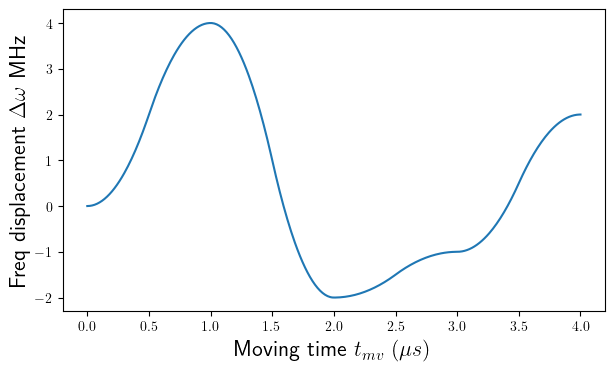

In [55]:
t_data, data = MT([85, 89, 83, 84, 87])
fig, ax = plt.subplots(figsize=(7,4), dpi = 100)
ax.plot(1e03 * t_data, data)
ax.set_xlabel(r"Moving time $t_{mv}$ $(\mu s)$", fontsize = 16)
ax.set_ylabel(r"Freq displacement $\Delta\omega$ MHz", fontsize=16)

plt.show()

Now modulate it with integral signals

In [42]:
# Std imports
import time
import numpy as np
import matplotlib.pyplot as plt

# Scipy imports
from scipy.interpolate import InterpolatedUnivariateSpline
from scipy.integrate import trapezoid


def acceleration(t, t_moving, a):
    """
    Constant accleration.

    Parameters
    ----------
    t : float
        The input time data.
    t_moving : float
        The assigned moving time for this step.
    a : float
        The assigned accleration for this step.
    """
    return (1/2) * a * t**2


def decelleration(t, t_moving, a):
    """
    Constant accleration.
    Parameters
    ----------
    t : float
        The input time data.
    t_moving : float
        The assigned moving time for this step.
    a : float
        The assigned accleration for this step.
    """
    return -(1/2) * a * t**2 + a*t*t_moving - (1/4)*a*t_moving**2


def data_stack(base_data, new_data):
    """
    Stacking the next iteration of ramping data to the old ones.
    """
    return np.append(base_data, base_data[-1] + new_data)


def accleration_solver(init_freq, target_freq, t_moving):
    """
    The analytical solution to the accleration of this process.
    """
    return 4*(target_freq - init_freq)/(t_moving **2)


def moving_time_solver(init_freq, target_freq):
    """
    To be the optimal time mapping based on initial and target frequencies(positions).
    To be upgraded when we are really trapping atoms.
    Will return 1 just for now.
    """
    return 1e-3


def freq_func_constant_ramp(freq_list, awg_resolution):
    """
    The constant acceleration ramping freq function itself.
    To be transform into integrals.

    Parameters
    ----------
    freq_list : list
        The atom position we want to scan through.
    awg_resolution : float
        The resolution of the awg card.
    """
    i = 0
    while i < len(freq_list) - 1:
        # Extract position data
        init_freq = freq_list[i]
        target_freq = freq_list[i+1]

        # Compute the optimum moving time and accleration in this iteration
        t_moving = moving_time_solver(init_freq, target_freq)
        a = accleration_solver(init_freq, target_freq, t_moving)

        # Generating the time data for this iteration
        # t_data_accleration and t_data_deccleration should be fixed in each iteration
        t_data_accleration, t_spacing = np.linspace(0, t_moving/2, int(awg_resolution * t_moving/2), endpoint=False, retstep=True)
        t_data_deccleration = np.linspace(t_moving/2, t_moving, int(awg_resolution * t_moving/2), endpoint=False)
        
        # Generating the raming data for this iteration
        # For the first iteration, there is no data to stack on.
        if i == 0:
            t_data = np.append(t_data_accleration, t_data_deccleration)
            data = np.append(acceleration(t_data_accleration, t_moving, a), decelleration(t_data_deccleration, t_moving, a))
        # For the i>0 iteration, we will need to stack the data on previous one and add some offsets.
        else:
            t_data = data_stack(base_data = t_data, new_data = np.append(t_data_accleration, t_data_deccleration) + t_spacing)
            #TODO: by doing this, we might waste time on the boundary points, since there are duplicated data points on the connections
            data = data_stack(base_data = data, new_data = np.append(acceleration(t_data_accleration, t_moving, a), decelleration(t_data_deccleration, t_moving, a)))
        i+=1
    return t_data, data


def moving_tweezer_ramping(freq_list, awg_resolution):
    """
    Taking the frequency function and generate its integral based on interpolation.
    
    Parameters
    ----------
    freq_list : list
        The atom position we want to scan through.
    awg_resolution : float
        The resolution of the awg card.

    Notes
    -----
    For the integration of freq function, there are three possible directions.
    
    1. Use InterpolatedUnivariateSpline to get the freq function and then integral.
    2. Use scipy.integral.cumulative_trapezoid to get the integral
    3. Work on the analytical solution of that integral if neccessary.

    All above will give the correct restult and the benchmarks for ramping 
    between two points are like,

    ramp data cal time = 0.06514325000000554
    InterpolatedUnivariateSplin cal time = 0.04459370900002568
    cumulative_trapezoid cal time = 0.004300666999995428.

    Another thing no notice is that if we are sampling with 625 MHz,
    then even freq function cal time will be forever. Luckily, the known
    tweezer moving time is in micro sec scale, so we don't need to worry about
    this issue. (Just for now)
    """
    # Generate the freq ramping data based on 
    # constant accleration
    #ramp_start = time.perf_counter()
    t_data, data = freq_func_constant_ramp(freq_list, awg_resolution)
    #ramp_end = time.perf_counter()

    # Since the data points might not be a trivial function for one to integrate
    # we use scipy model to help us better integrate the freq function with some 
    # numerical techniques
    
    # Interpolation method
    # interpolate_start = time.perf_counter()
    # interpolated_freq_function = InterpolatedUnivariateSpline(t_data, data, k=1)
    # integral_val = interpolated_freq_function.integral(t_data[0], t_data[-1])
    # interpolate_end = time.perf_counter()

    # Direct integration, will return the "cumulated" integration
    # We only need the last one here
    #inter_start = time.perf_counter()
    integral_val = trapezoid(data, t_data)
    #inter_end = time.perf_counter()

    # print(f'ramp data cal time = {ramp_end - ramp_start}')
    # print(f'interpolation cal time = {interpolate_end - interpolate_start}')
    # print(f'integral cal time = {inter_end - inter_start}')

    return integral_val

In [43]:
print(moving_tweezer_ramping([85, 89, 83, 84, 87], awg_resolution = 625e6))

0.001999996799994879


In [44]:
l = np.linspace(0, 2, 2)
a = np.array([1, 2])
b = np.array([[3], [4]])
print("l=", l)
print("a=", a)
print(a.reshape((2, 1)))
print(b.shape)
b * a

l= [0. 2.]
a= [1 2]
[[1]
 [2]]
(2, 1)


array([[3, 6],
       [4, 8]])

In [45]:
import numpy as np
#This method utilize the idea of frequency modulation method to generate signal
def freq_mod(freq_spacing,tones_num,MinFreq):
    """
    This method utilize the idea of frequency modulation method to generate signal.

    Note
    -----
    Frequencies are in unit of MHz.
    
    """
    freq_step = freq_spacing*10**6
    #freq_step = 0.5*10**6
    T = 1/freq_step
    min_freq = MinFreq*10**6
    max_freq = (MinFreq+freq_spacing*(tones_num-1))*10**6
    sample_rate = 625*10**6
    initial_phi = -np.pi/2
    num_tones = int( max_freq/freq_step)
    amplitude = np.ones(num_tones)
    def signal(peak, t):
        phase_list = []
        for i in range(1,num_tones+1):
            phi_i = phase_cal(peak_list,initial_phi,i)
            phase_list.append(phi_i)
        A = 0
        for k in range (1,num_tones+1):
            A = A + (peak[k-1]/2)**(1/2)*np.cos(2*np.pi*k*freq_step*t+phase_list[k-1]*np.ones(t.size))
        return A
    def phase_cal(peak,phi_init,n):
        theta = 0
        for i in range(1,n):
            theta = theta + (n-i)*peak[i-1]
        theta_n = phi_init -theta*2*np.pi
        #theta_n = theta_n+np.random.uniform(-0.1, 0.1)
        #print(theta_n)
        return theta_n

    peak_bound = math.floor(min_freq/freq_step)-1
    peak_count = num_tones - peak_bound
    peak_zero = np.zeros(peak_bound)
    peak_one = np.ones(peak_count)
    print(peak_count)
    #peak_one = np.load("C:/Users/TweeSr/Documents/python/optimal_amplitude_y.npy")

    peak_list = np.append(peak_zero,peak_one)
    peak_list = peak_list/np.sum(peak_list)

    sample_points = int(T*sample_rate)
    t_step = np.linspace(0,T,sample_points, endpoint=False)
    #print(phase_list)
    print(peak_one)
    x = signal(peak_list,t_step)

    x_final = x

    for i in range(100):
        x_final = np.append(x_final,x)
    return x_final


def RF_sig(t,array_tones,amp,phase):

    A = 0
    for i in range(array_tones.size):
        A += amp[i]*np.sin(array_tones[i]*2*np.pi*t+phase[i])
    normalized_factor = np.max(A)
    return A/normalized_factor


def sin_sum(parameters, length= 1*10**(-3)):
    """

    Parameters
    ----------
    parameters : dictionary
        for giving the frequencies, the amplitudes and the phases.

    Returns
    -------
    signal : s

    """
    
    freq_array = np.array(parameters["freq"])*10**6
    amp_array = np.array(parameters["amp"])
    phase_array = np.array(parameters["phase"])
    random_phase =np.random.uniform(0,2*np.pi+0.00000000001,freq_array.size)+phase_array
    #print(random_phase)
    t = np.linspace(0,length,int(625*10**6*length),endpoint= False)
    signal = RF_sig(t,freq_array,amp_array,random_phase)

    return signal

# Static array x

tw_num = 10
center_freq = 80
freq_spacing = 1

t = 3.2*10**(-3)
start_index = -1*(tw_num//2)
freq_list = []

# Generate trap positions centered around 80 MHz    
for i in range(tw_num):
    freq_list.append(center_freq+(start_index+i)*freq_spacing)

freq_array = freq_list # why?
amp = len(freq_list)*[1]
phase = np.random.uniform(0,2*np.pi+0.00000000001,len(freq_array))
a_data = dict([("freq",freq_array),("amp",amp),("phase",phase)])
static_data = sin_sum(a_data,length = t)


# Static array y
t2 = t
t_step = np.linspace(0, t2, int(625*10**6*t2), endpoint = False) 
y = np.sin(80*10**6*2*np.pi*t_step)

new = [static_data] + [y]
print(f'static_data: {static_data}\n')
print(f'len(static_data): {len(static_data)}')
print(f'y: {y}\n')
print([(1, 2)] + [(3, 4)])
print(f'new: {new}\n')
print(f'new[0]: {new[0]}\n')
print(f'new[1]: {new[1]}\n')
print(f'new[0][1]: {new[0][1]}\n')
print(f'np.column_stack(new).flatten(): {np.column_stack(new).flatten()}\n')


static_data: [-0.08979273 -0.21414563 -0.22269238 ...  0.22927931  0.21575292
  0.08506317]

len(static_data): 2000000
y: [ 0.          0.72030902  0.99928947 ... -0.66601187 -0.99928947
 -0.72030902]

[(1, 2), (3, 4)]
new: [array([-0.08979273, -0.21414563, -0.22269238, ...,  0.22927931,
        0.21575292,  0.08506317]), array([ 0.        ,  0.72030902,  0.99928947, ..., -0.66601187,
       -0.99928947, -0.72030902])]

new[0]: [-0.08979273 -0.21414563 -0.22269238 ...  0.22927931  0.21575292
  0.08506317]

new[1]: [ 0.          0.72030902  0.99928947 ... -0.66601187 -0.99928947
 -0.72030902]

new[0][1]: -0.21414563191950792

np.column_stack(new).flatten(): [-0.08979273  0.         -0.21414563 ... -0.99928947  0.08506317
 -0.72030902]



In [46]:
import numpy as np
import h5py
import time

def grab_atom_wave_gen(init_freq, Amp_mt, init_phase, t_grab, awg_resolution):
    """
    Generating the rf signal that grab atom at the assigned location.

    Parameters
    ----------
    init_freq : float
        The atom location that we want to migrate.
        Format : [wx, wy]
    Amp_mt : float
        Trap depth of the moving tweezer.
    t_grab : float
        The time that we want to spend on grabbing sigle atom.
    """

    # Define data
    t_grab_data = np.linspace(0, t_grab, int(awg_resolution * t_grab))
    Amp_ramp_data = np.linspace(0, Amp_mt, int(awg_resolution * t_grab))
    phase = np.repeat(init_phase, len(t_grab_data))
    
    print(f"init_freq: {init_freq}")
    # Returning (signal_x, signal_y)
    return Amp_ramp_data * np.cos(np.array(init_freq).reshape((2, 1)) * t_grab_data + phase)


file_time = time.strftime("%Y%m%d_%H%M%S")
file_path = f'MovingTweezerSignal{file_time}.hdf5'
data_file = h5py.File(file_path,'w')
signal = grab_atom_wave_gen(init_freq = [1, 1], Amp_mt = 1, init_phase = 1, t_grab = 1, awg_resolution = 10)
test_signal = np.random.random(size=(100,20))
data_file.create_dataset('test', data = 1)
data_file.close()


init_freq: [1, 1]


In [47]:
import numpy as np
x = np.array([0, 1]).reshape((2, 1))
a = np.array([[0, 1, 4], [2, 3, 5]])
print(x)
print(x.shape)
sp = x.shape
print(sp[1])
print(x[:, -1])
print(a)
print(a[0])
print(a[1])
print(a[:, -1].shape)
print(a[:, -1].reshape((2,1)))

[[0]
 [1]]
(2, 1)
1
[0 1]
[[0 1 4]
 [2 3 5]]
[0 1 4]
[2 3 5]
(2,)
[[4]
 [5]]


In [48]:
x = ((2, 4), (6, 8))
result = reversed(x)
result = tuple(result)
print(result)
print(result[0])

((6, 8), (2, 4))
(6, 8)


[(0, 1), (1, 1)]
[(2, 3), (3, 3)]
[(1, 1), (2, 3)]


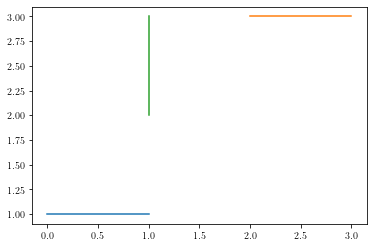

In [49]:
import numpy as np
import pylab as pl
from matplotlib import collections  as mc
import matplotlib.pyplot as plt
lines = [[(0, 1), (1, 1)], [(2, 3), (3, 3)], [(1, 2), (1, 3)]]
c = np.array([(1, 0, 0, 1), (0, 1, 0, 1), (0, 0, 1, 1)])

for line in lines:
    print(list(zip(*line)))
    plt.plot(list(zip(*line))[0], list(zip(*line))[1])


# lc = mc.LineCollection(lines, colors=(0, 0, 0, 1), linewidths=2)
# fig, ax = pl.subplots()
# ax.add_collection(lc)
# ax.autoscale()
# ax.margins(0.1)